### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
df = pd.read_csv("Dataset/cars.csv")

### Analyzing the Data

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.describe().round(2)

,year,selling_price,km_driven
count,4340.00,4340.00,4340.00
mean,2013.09,504127.31,66215.78
std,4.22,578548.74,46644.10
min,1992.00,20000.00,1.00
25%,2011.00,208749.75,35000.00
50%,2014.00,350000.00,60000.00
75%,2016.00,600000.00,90000.00
max,2020.00,8900000.00,806599.00


In [6]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
df.duplicated().sum()

763

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

### Feature Engineering

In [10]:
df['Year_Age'] = 2025 - df['year']

In [11]:
df['Year_Category'] = pd.cut(df['Year_Age'], bins = [0, 5, 10, np.inf], labels = ['New', 'Mid', 'Old'])

In [12]:
df.drop(['year'], axis = 1, inplace = True)

In [13]:
df['brand'] = df['name'].str.split().str[0]
df.drop(['name'], axis = 1, inplace = True)

In [14]:
owner_map = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 0
}
df['owner'] = df['owner'].map(owner_map)

In [15]:
km_driven = np.log1p(df['km_driven'])

In [16]:
less_mean = (df['selling_price'] < df['selling_price'].mean()).sum()
print(f"Number of Cars whose Price less then the Mean of Price is {less_mean}.")

Number of Cars whose Price less then the Mean of Price is 2286.


In [17]:
less_median = (df['selling_price'] < df['selling_price'].median()).sum()
print(f"Number of Cars whose Price less then the Median of Price is {less_median}.")

Number of Cars whose Price less then the Median of Price is 1742.


In [18]:
print("The most common brands are -:")
df['brand'].value_counts().head(10)

The most common brands are -:


brand
Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Ford           220
Honda          216
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Name: count, dtype: int64

In [19]:
df.groupby('brand')['selling_price'].agg(['min', 'max', 'mean']).round(2)

,min,max,mean
brand,,,
Ambassador,50000,430000,200000.00
Audi,650000,8900000,2185451.61
BMW,480000,4950000,2242800.00
Chevrolet,50000,1000000,232713.17
Daewoo,60000,60000,60000.00
Datsun,200000,450000,296551.66
Fiat,55000,890000,287093.72
Force,346000,346000,346000.00
Ford,20000,3200000,563627.23


Text(0.5, 1.0, 'Histogram → Distribution of Price (USD)')

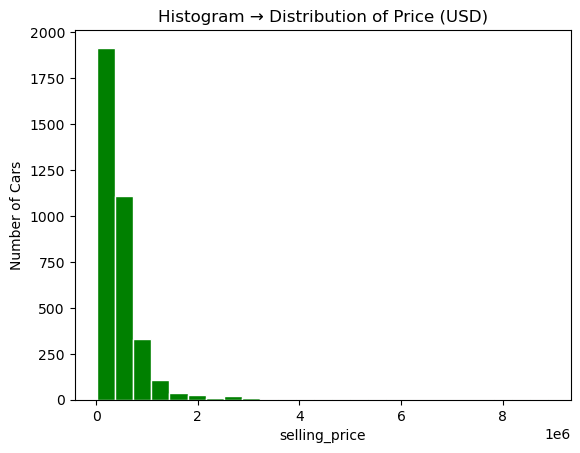

In [22]:
plt.hist(df['selling_price'], bins = 25, edgecolor = 'white', color = 'green')
plt.xlabel("selling_price")
plt.ylabel("Number of Cars")
plt.title("Histogram → Distribution of Price (USD)")

### Machine Learning

#### Importing Libraries

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score

#### Stratified Shuffle Split

In [24]:
df['Price_cat'] = pd.cut(df['selling_price'], bins = [0, 30000, 40000, 50000, 60000, np.inf], labels = [1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_set, test_set in split.split(df, df['Price_cat']):
    strat_train = df.iloc[train_set]
    strat_test = df.iloc[test_set]

#### Copying the Training Data

In [48]:
cars_train = strat_train.copy()

#### Separating Features and Labels

In [50]:
cars_feature_train = cars_train.drop(["selling_price", "Price_cat"], axis = 1)
cars_label_train = cars_train['selling_price']

In [51]:
y_train_log = np.log1p(cars_label_train)

#### Separating Numerical and Categorical Data

In [52]:
cars_num_train = ['km_driven', 'owner', 'Year_Age']
cars_cat_train = ['brand', 'fuel', 'seller_type', 'transmission', 'Year_Category']

### Let's Start Making Pipelines

#### Numerical and Categorical Pipelines

In [53]:
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown = "ignore")),
])
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()),
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, cars_num_train),
    ("cat", cat_pipeline, cars_cat_train),
])

#### Transforming the Data

In [54]:
cars_prepared_train = full_pipeline.fit_transform(cars_feature_train)

### Training the Model

#### Linear Regression Model

In [55]:
lin_model = LinearRegression()
lin_model.fit(cars_prepared_train, y_train_log)
lin_predict = lin_model.predict(cars_prepared_train)
lin_predict_real = np.expm1(lin_predict)
lin_CV = cross_val_score(lin_model, cars_prepared_train, y_train_log, scoring = "neg_root_mean_squared_error", cv = 10)
lin_R2 = r2_score(cars_label_train, lin_predict_real)
lin_MAE = mean_absolute_error(cars_label_train, lin_predict_real)
lin_RMSE = root_mean_squared_error(cars_label_train, lin_predict_real)

print("Results of Linear Regressor Model on Training Data -:")
print(pd.Series(lin_CV).describe())
print(f"R2 Score: {lin_R2:.2f}")
print(f"MAE Score: {lin_MAE:.2f}")
print(f"RMSE Score: {lin_RMSE:.2f}")

Results of Linear Regressor Model on Training Data -:
count    10.000000
mean     -0.384517
std       0.018104
min      -0.408540
25%      -0.398639
50%      -0.388842
75%      -0.370548
max      -0.354470
dtype: float64
R2 Score: 0.73
MAE Score: 133150.21
RMSE Score: 252800.38


#### Random Forest Regressor Model

In [56]:
forest_model = RandomForestRegressor(
    n_estimators = 250,
    max_depth = None,
    min_samples_split = 4,
    min_samples_leaf = 1,
    random_state = 42,
    n_jobs = -1 
)
print("Training the Model.......")
forest_model.fit(cars_prepared_train, y_train_log)
forest_predict = forest_model.predict(cars_prepared_train)
forest_predict_real = np.expm1(forest_predict)
print("Running Cross Validations.......")
forest_CV = cross_val_score(forest_model, cars_prepared_train, y_train_log, scoring = "neg_root_mean_squared_error", cv = 3, n_jobs = -1)
forest_R2 = r2_score(cars_label_train, forest_predict_real)
forest_MAE = mean_absolute_error(cars_label_train, forest_predict_real)
forest_RMSE = root_mean_squared_error(cars_label_train, forest_predict_real)

print("Results of Random Forest Regressor Model on Training Data -:")
print(pd.Series(forest_CV).describe())
print(f"R2 Score: {forest_R2:.2f}")
print(f"MAE Score: {forest_MAE:.2f}")
print(f"RMSE Score: {forest_RMSE:.2f}")

Training the Model.......
Running Cross Validations.......
Results of Random Forest Regressor Model on Training Data -:
count    3.000000
mean    -0.410436
std      0.016261
min     -0.423889
25%     -0.419471
50%     -0.415053
75%     -0.403709
max     -0.392365
dtype: float64
R2 Score: 0.87
MAE Score: 73861.78
RMSE Score: 175323.41


In [57]:
grad_model = GradientBoostingRegressor(
    n_estimators = 1000,
    learning_rate = 0.01,
    max_depth = 4,
    min_samples_split=5,
    min_samples_leaf = 3,
    random_state = 42
)
print("Training the Model......")
grad_model.fit(cars_prepared_train, y_train_log)
grad_predict = grad_model.predict(cars_prepared_train)
grad_predict_real = np.expm1(grad_predict)
print("Running Cross Validations.......")
grad_CV = cross_val_score(grad_model, cars_prepared_train, y_train_log, scoring = "neg_root_mean_squared_error", cv = 10)
grad_R2 = r2_score(cars_label_train, grad_predict_real)
grad_MAE = mean_absolute_error(cars_label_train, grad_predict_real)
grad_RMSE = root_mean_squared_error(cars_label_train, grad_predict_real)

print("Results of Gradient Boosting on Training Data -:")
print(pd.Series(grad_CV).describe())
print(f"R2 Score: {grad_R2:.2f}")
print(f"MAE Score: {grad_MAE:.2f}")
print(f"RMSE Score: {grad_RMSE:.2f}")

Training the Model......
Running Cross Validations.......
Results of Gradient Boosting on Training Data -:
count    10.000000
mean     -0.373492
std       0.018114
min      -0.409190
25%      -0.386985
50%      -0.367524
75%      -0.357902
max      -0.355316
dtype: float64
R2 Score: 0.81
MAE Score: 117057.71
RMSE Score: 211239.79


### Evaluating on Test Set

In [58]:
cars_test = strat_test.copy()

In [59]:
cars_feature_test = cars_test.drop(["selling_price", "Price_cat"], axis = 1)
cars_label_test = cars_test['selling_price']

In [60]:
y_test_log = np.log1p(cars_label_test)

In [61]:
cars_num_test = ['km_driven', 'owner', 'Year_Age']
cars_cat_test = ['brand', 'fuel', 'seller_type', 'transmission', 'Year_Category']

In [62]:
cars_prepared_test = full_pipeline.transform(cars_feature_test)

In [64]:
lin_predict_test = lin_model.predict(cars_prepared_test)
lin_predict_real_test = np.expm1(lin_predict_test)
lin_R2_test = r2_score(cars_label_test, lin_predict_real_test)
lin_MA_test = mean_absolute_error(cars_label_test, lin_predict_real_test)
lin_RMSE_test = root_mean_squared_error(cars_label_test, lin_predict_real_test)

print("Results of Linear Regressor Model on Test Data -:")
print(f"R2 Score: {lin_R2_test:.2f}")
print(f"MAE Score: {lin_MA_test:.2f}")
print(f"RMSE Score: {lin_RMSE_test:.2f}")

Results of Linear Regressor Model on Test Data -:
R2 Score: 0.71
MAE Score: 146291.03
RMSE Score: 324148.14


In [70]:
forest_predict_test = forest_model.predict(cars_prepared_test)
forest_predict_real_test = np.expm1(forest_predict_test)
print("Evaluating.......")
forest_R2_test = r2_score(cars_label_test, forest_predict_real_test)
forest_MAE_test = mean_absolute_error(cars_label_test, forest_predict_real_test)
forest_RMSE_test = root_mean_squared_error(cars_label_test, forest_predict_real_test)

print("Results of Random Forest Regressor Model on Test Data -:")
print(f"R2 Score: {forest_R2_test:.2f}")
print(f"MAE Score: {forest_MAE_test:.2f}")
print(f"RMSE Score: {forest_RMSE_test:.2f}")

Evaluating.......
Results of Random Forest Regressor Model on Test Data -:
R2 Score: 0.64
MAE Score: 149552.02
RMSE Score: 362913.11


In [71]:
grad_predict_test = grad_model.predict(cars_prepared_test)
grad_predict_real_test = np.expm1(grad_predict_test)
grad_R2_test = r2_score(cars_label_test, grad_predict_real_test)
grad_MAE_test = mean_absolute_error(cars_label_test, grad_predict_real_test)
grad_RMSE_test = root_mean_squared_error(cars_label_test, grad_predict_real_test)

print("Results of Gradient Boosting on Training Data -:")
print(f"R2 Score: {grad_R2_test:.2f}")
print(f"MAE Score: {grad_MAE_test:.2f}")
print(f"RMSE Score: {grad_RMSE_test:.2f}")

Results of Gradient Boosting on Training Data -:
R2 Score: 0.69
MAE Score: 148883.58
RMSE Score: 336641.55


#### In this project, I built a machine learning pipeline to predict used car resale prices. The workflow included feature engineering (Car Age, Year Category, Brand extraction, log transformation of km_driven), preprocessing pipelines for numeric and categorical variables, and training multiple models (Linear Regression, Random Forest, Gradient Boosting).

#### The results showed that while Linear Regression provided a stable baseline (R² ≈ 0.71 on test data), Random Forest suffered from overfitting (Train R² ≈ 0.87, Test R² ≈ 0.64). Gradient Boosting generalized slightly better (R² ≈ 0.69, RMSE lower than RF), but overall performance was limited. Errors remained high (MAE ≈ ₹1.4–1.5L, RMSE ≈ ₹3L+), indicating that the available dataset lacked important predictive features such as car variant, location, service history, and condition.

#### This project highlights an important lesson in applied machine learning: model performance is constrained by data quality. Even with advanced models and careful preprocessing, the absence of key features limits predictive power.